# Визуализация

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

## Простые графики

Самый простой сценарий использования — если у нас есть два массива значений и мы хотим посмотреть, есть ли между ними какая-то связь.

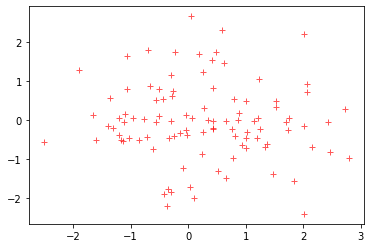

In [ ]:
plt.plot(
    np.random.randn(100), 
    np.random.randn(100), 
    color="red", 
    marker="+", 
    linewidth=0, 
    alpha=.65
)

Либо же нам нужно отразить динамику какой-то величины:

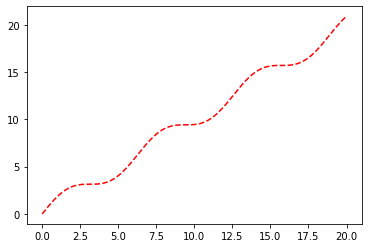

In [ ]:
xs = np.linspace(0, 20, 1000)
ys = np.sin(xs) + xs

plt.plot(xs, ys, "r--")

Настроим отображение линии:

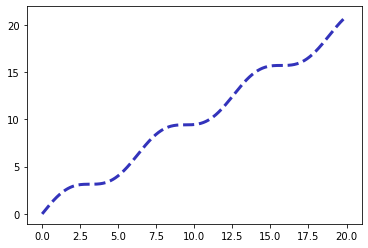

In [ ]:
xs = np.linspace(0, 20, 1000)
ys = np.sin(xs) + xs

plt.plot(
    xs, 
    ys, 
    color="#3333bb",
    linestyle="--",
    linewidth=3
)

Изобразим несколько линий на одном графике:

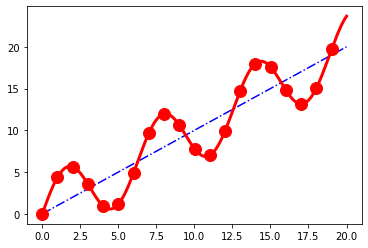

In [ ]:
xs = np.linspace(0, 20, 1000)
ys_1 = xs
ys_2 = 4 * np.sin(xs) + xs

plt.plot(xs, ys_1, "b-.")
plt.plot(
    xs, 
    ys_2, 
    markevery=50,
    color="r",
    linewidth=3,
    marker="o",
    markersize=12,
)

Более подробно ознакомитьсья с параметрами линий можно здесь: https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

## Управление осями

Text(0.5, 1.0, 'График роста красной линии')

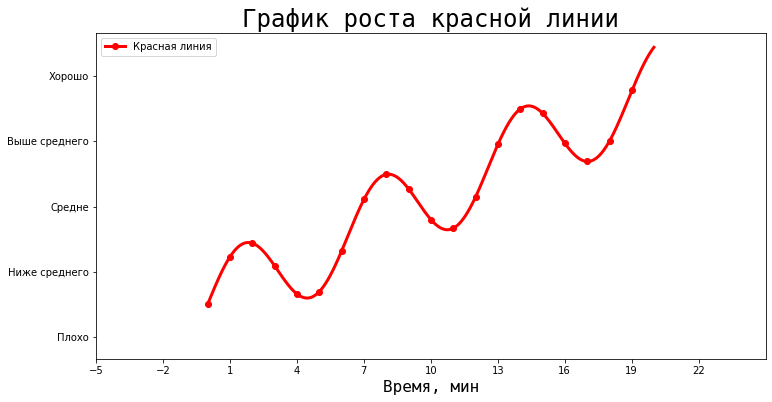

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ys_1 = xs
ys_2 = 4 * np.sin(xs) + xs

ax.plot(
    xs, 
    ys_2, 
    markevery=50,
    color="r",
    linewidth=3,
    marker="o",
    markersize=6,
    label="Красная линия"
)

ax.set_xlim(-5, 25)
ax.set_ylim(-5, 25)

ax.set_xlabel(
    "Время, мин", 
    fontdict={
        "size": 16, 
        "family": "monospace"
})

ax.set_xticks(np.arange(10) * 3 - 5)
ax.set_yticks(np.arange(5) * 6 - 3)

ax.set_yticklabels([
    "Плохо", 
    "Ниже среднего", 
    "Средне", 
    "Выше среднего", 
    "Хорошо"
])

ax.legend()

ax.set_title(
    "График роста красной линии", 
    fontdict={
        "size": 24, 
        "family": "monospace"
    }
)

Ось Х может отражать время:

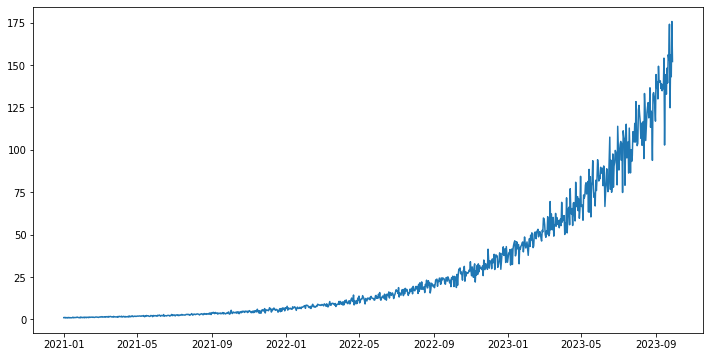

In [ ]:
from datetime import date, timedelta

N = 1001

fig, ax = plt.subplots(figsize=(12, 6))

xs = np.linspace(0, 5, num=N)
ys = np.exp(xs) + .1 * np.random.randn(N) * np.exp(xs)
x_ticks = [date(2021, 1, 1) + i * timedelta(days=1) for i in range(N)]

ax.plot(
    x_ticks,
    ys,
);

В случае, если данные имеют экспоненциальную форму, бывает удобно воспользоваться логарифмированием:

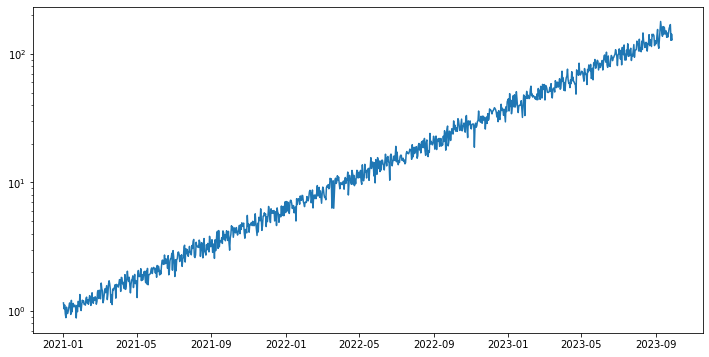

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.semilogy(
    x_ticks,
    ys,
)

## Несколько графиков

In [ ]:
import matplotlib.patches as patches

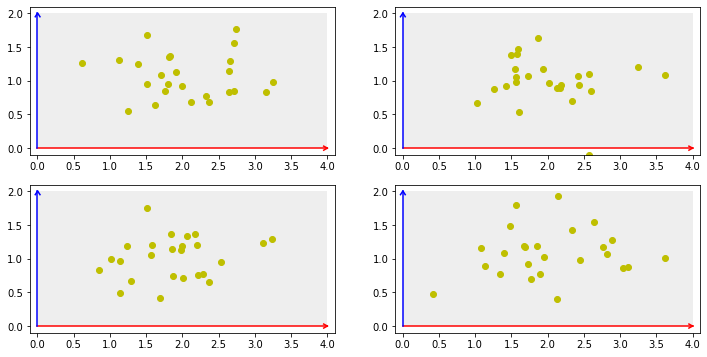

In [ ]:
fig = plt.figure(figsize=(12, 6))

for i in range(4):
  ax = fig.add_subplot(2, 2, i + 1)

  ax.plot([0, 4], [0, 0], "r")
  ax.plot([3.95, 4], [0.03, 0], "r")
  ax.plot([3.95, 4], [-0.03, 0], "r")

  ax.plot([0, 0], [0, 2], "b")
  ax.plot([0, -0.03], [2, 1.95], "b")
  ax.plot([0.005, 0.035], [2, 1.95], "b")

  rect = patches.Rectangle((0, 0), 4, 2, linewidth=0, facecolor='#eeeeee')

  # Add the patch to the Axes
  ax.add_patch(rect)

  ax.plot(
      np.random.randn(25) / 3 * 2 + 2, 
      np.random.randn(25) / 3 + 1,
      "yo"
  )

  ax.set_xlim(-0.1, 4.1)
  ax.set_ylim(-0.1, 2.1)

## Более сложные графики

### Диаграмма рассеяния
В англоязычной литературе scatter plot

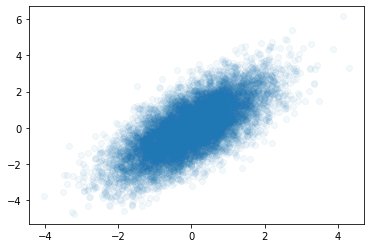

In [ ]:
xs = np.random.randn(10000)
ys = xs + np.random.randn(10000)

plt.scatter(xs, ys, alpha=.05)

Отобразим несколько диаграмм рассеяния на одном графике, а заодно настроим визуализацию:

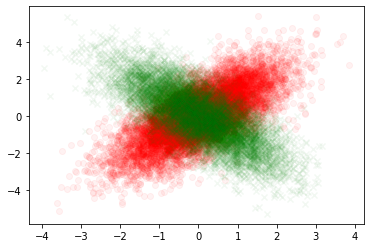

In [ ]:
xs = np.random.randn(10000)
ys = xs + np.random.randn(10000)

plt.scatter(
    xs, 
    ys,
    c="r",
    alpha=.05,
)

xs = np.random.randn(10000)
ys = np.random.randn(10000) - xs

plt.scatter(
    xs,
    ys,
    c="g",
    marker="x",
    alpha=.05,
)

В чем разница между plt.plot и plt.scatter?  
Основное отличие — во втором случае мы имеем больший контроль над каждой отдельной точкой. Например — мы можем задавать ее цвет:

In [ ]:
colors = np.random.randn(1000)

In [ ]:
colors = np.random.choice(5, 1000)

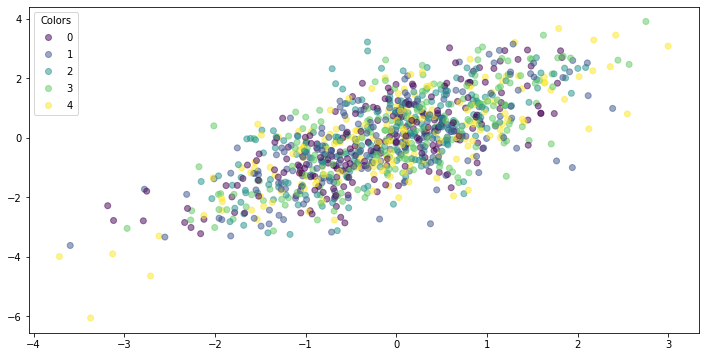

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

xs = np.random.randn(1000)
ys = xs + np.random.randn(1000)

scatter = plt.scatter(
    xs, 
    ys,
    c=colors,
    alpha=.5,
)

handles, labels = scatter.legend_elements(prop="colors", alpha=.5)
legend2 = ax.legend(handles, labels, loc="upper left", title="Colors")

In [ ]:
len(np.unique(colors))

1000

### Гистограммы

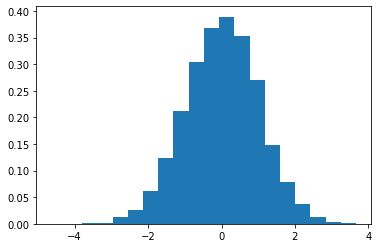

In [ ]:
values = np.random.randn(10000)

_ = plt.hist(
    values,
    bins=20,
    density=True
)

### Pie chart

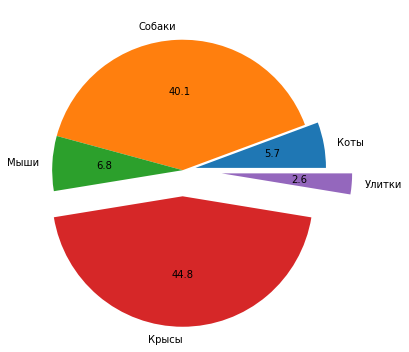

In [ ]:
def softmax(x):
  return np.exp(x) / np.exp(x).sum()

fig, ax = plt.subplots(figsize=(12, 6))

xs = np.random.randn(5)

_ = ax.pie(
    softmax(xs),
    explode=[.1, 0., 0., .2, .3],
    labels=[
        "Коты",
        "Собаки",
        "Мыши",
        "Крысы",
        "Улитки"
    ],
    autopct="%.1f"
)

Рассмотреть все возможности matplotlib в рамках этого курса не получится. Чтобы лучше разобраться — можно обратиться к документации, например: https://matplotlib.org/stable/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py

## Сохраняем графики в виде картинок


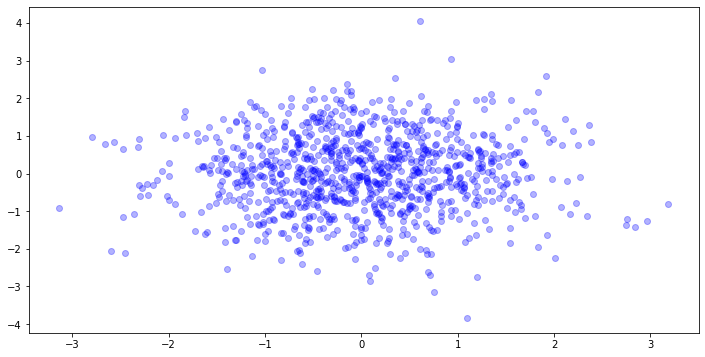

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(np.random.randn(1000), np.random.randn(1000), "bo", alpha=.3)

plt.savefig(
    "file.png",
    dpi=300,
)

Теперь загрузим картинку обратно и отобразим её:

In [ ]:
image = plt.imread("file.png")
type(image)

numpy.ndarray

In [ ]:
image.shape

(1800, 3600, 4)

(-0.5, 3599.5, 1799.5, -0.5)

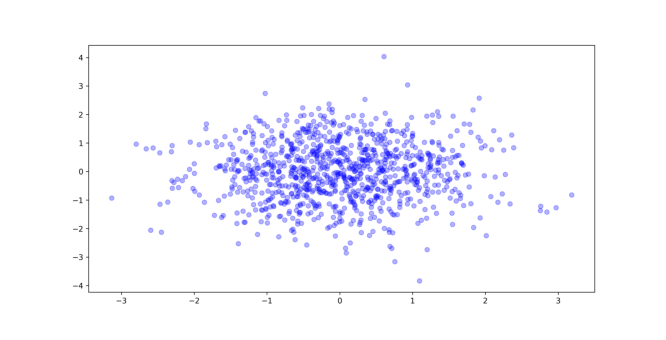

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.imshow(
    image
)

plt.axis('off')

Оси в данном случае лишние. Чтобы избавиться от них, можно раскомментировать последнюю строчку.

## Seaborn

Перейдем теперь к другой библиотеке — Seaborn.
Matplotlib позволяет очень детально настраивать графики, однако без детальных настроек графики выглядят резковато. Очень хотелось бы иметь библиотеку, позволяющую получать более приятные глазу картинки одной строкой кода.

С другой стороны Matplotlib имеет сравнительно малый набор графиков для разведочного анализа данных. Например, [KDE plot](https://ru.wikipedia.org/wiki/Ядерная_оценка_плотности) или [Joint plot](https://en.wikipedia.org/wiki/Joint_probability_distribution). Более того, Matplotlib работает в первую очередь с numpy.array, а часто удобнее строить графики для pandas.DataFrame: учитывать разные показатели объектов и отражать это на графике.

Чтобы решить эти две проблемы, поверх Matplotlib реализовали библиотеку Seaborn. Это означает, что можно пользоваться более удобными функциями для построения более красивых графиков, но всегда можно настроить какие-то детали так же, как и в Matplotlib.

### Графики matplotlib со стилями seaborn

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

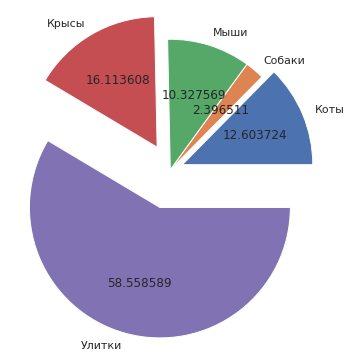

In [ ]:
def softmax(x):
  return np.exp(x) / np.exp(x).sum()

fig, ax = plt.subplots(figsize=(12, 6))

xs = np.random.randn(5)

_ = ax.pie(
    softmax(xs),
    explode=[.1, 0., 0., .2, .3],
    labels=[
        "Коты",
        "Собаки",
        "Мыши",
        "Крысы",
        "Улитки"
    ],
    autopct="%f"
)

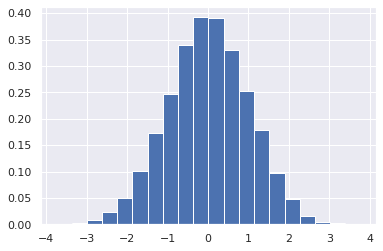

In [ ]:
values = np.random.randn(10000)

_ = plt.hist(
    values,
    bins=20,
    density=True
)

### Boxplot

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

--2021-09-17 11:31:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data’

auto-mpg.data       100%[===================>]  29.58K   197KB/s    in 0.2s    

2021-09-17 11:31:12 (197 KB/s) - ‘auto-mpg.data’ saved [30286/30286]



In [ ]:
import pandas as pd

mpg_df = pd.read_csv("auto-mpg.data", sep="\s+", header=None)
mpg_df.columns = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "model year",
    "origin",
    "car name"
]

mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


Таблица содержит некорректные значения, давайте избавимся от них:

In [ ]:
for col in mpg_df.columns:
  print(col, mpg_df[col].dtype)

mpg float64
cylinders int64
displacement float64
horsepower object
weight float64
acceleration float64
model year int64
origin int64
car name object


В частности, horsepower неожиданно object, а не float64, исправим это:

In [ ]:
for hp_value in mpg_df.horsepower:
    try:
        float(hp_value)
    except ValueError:
        print(hp_value)

?
?
?
?
?
?


Видим, что в некоторых строках стоят вопросительные знаки. Избавимся от этих строк, а значения horsepower в остальных конвертируем в тип float.

In [ ]:
mpg_df = mpg_df.loc[mpg_df.horsepower != "?", :]
mpg_df.loc[:, "horsepower"] = mpg_df.horsepower.astype(float)

for col in mpg_df.columns:
  print(col, mpg_df[col].dtype)

mpg float64
cylinders int64
displacement float64
horsepower float64
weight float64
acceleration float64
model year int64
origin int64
car name object


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


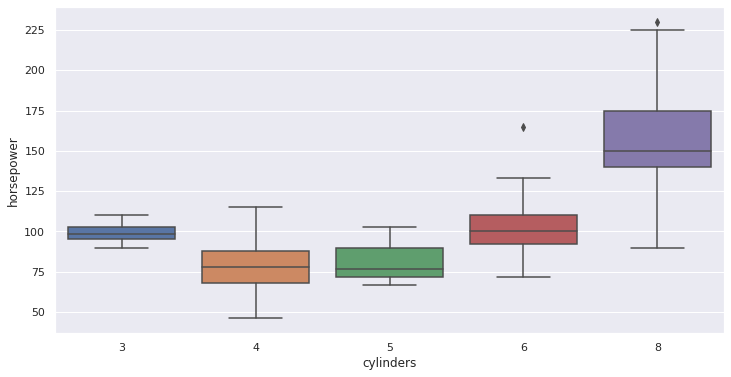

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(
    y="horsepower",
    x="cylinders",
    data=mpg_df,
)

### Scatterplot

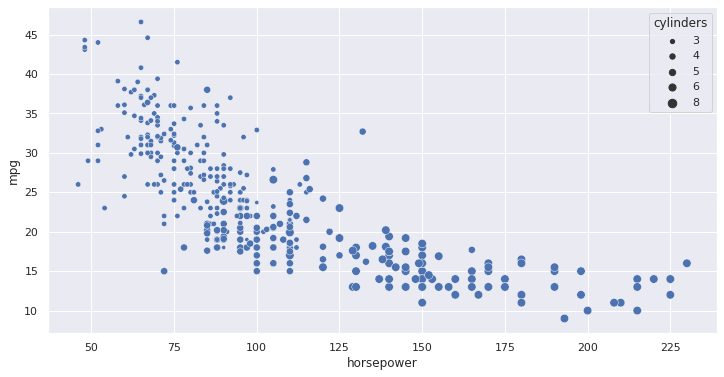

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(
    x="horsepower",
    y="mpg",
    size="cylinders",
    data=mpg_df
)

# ax.set_xscale("log")

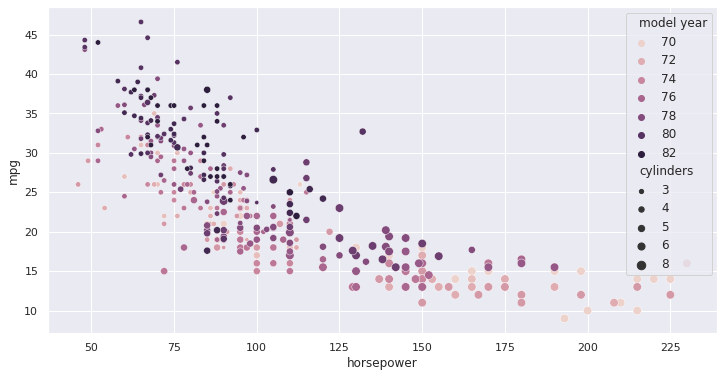

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(
    x="horsepower",
    y="mpg",
    size="cylinders",
    hue="model year",
    data=mpg_df
)

Представим, что данных у нас много больше:

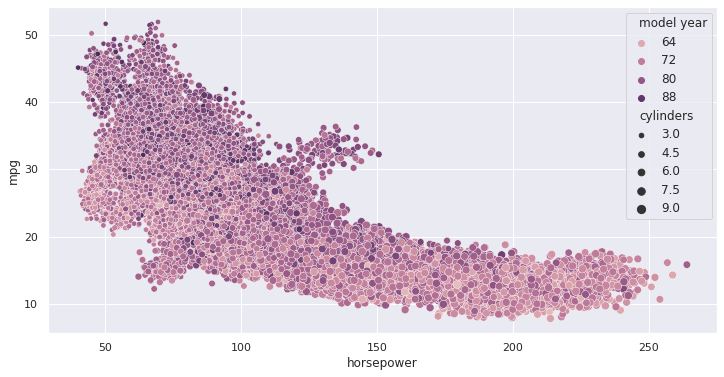

In [ ]:
columns = ["mpg", "horsepower", "model year", "cylinders"]
data_arr = mpg_df.loc[:, columns].values

data_arrs = [data_arr]
for _ in range(99):
    new_data_arr = data_arr + .05 * data_arr * np.random.randn(*data_arr.shape)
    data_arrs.append(new_data_arr)

data_arr = np.concatenate(data_arrs, axis=0)

large_mpg_df = pd.DataFrame(
    data_arr,
    columns=columns
)

fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(
    x="horsepower",
    y="mpg",
    size="cylinders",
    hue="model year",
    data=large_mpg_df
)

Несмотря на то, что основные закономерности все ещё угадываются, картинка получилась перегруженной и долго отрисовывалась.

### Hexbinplot

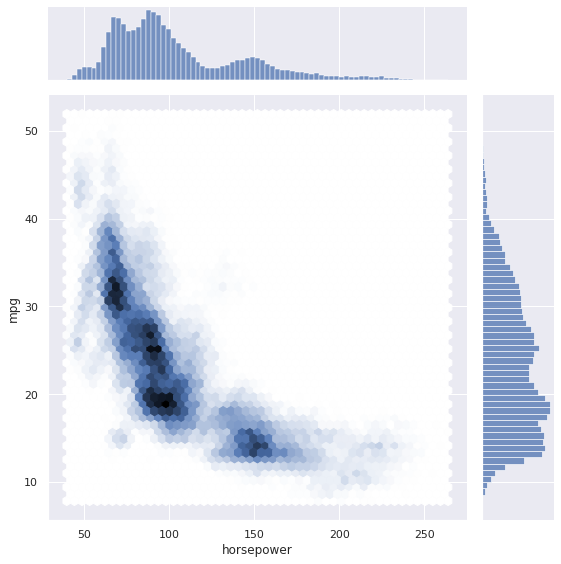

In [ ]:
sns.jointplot(
    x="horsepower",
    y="mpg",
    data=large_mpg_df,
    kind="hex",
    height=8
)

Этот график вдвое быстрее был нарисован, а также на нем видны кластеры, области с более высокой плотностью точек, чего не видно на предыдущем графике.

### Heatmap

In [ ]:
mpg_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


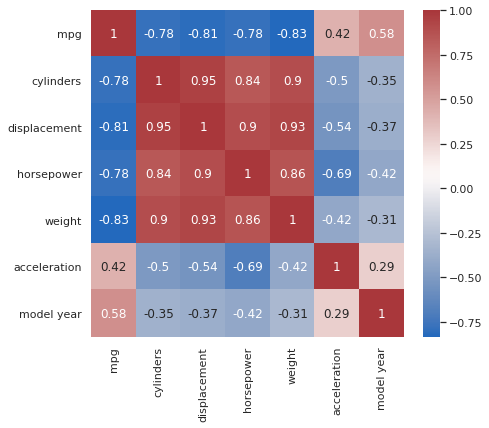

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(
    mpg_df.drop("origin", axis=1).corr(),
    cmap="vlag",
    annot=True,
    ax=ax
)

Так же, как и в случае matplotlib, рассмотрение всех доступных графиков в seaborn невозможно в этом уроке. [Здесь](https://seaborn.pydata.org/examples/index.html) можно ознакомиться с ними самостоятельно.